# Using BLE RSSI Values to Classify Proximity with Deep Neural Networks

In [1]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import visualkeras
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rssi_dataset_1.csv")

In [3]:
train_labels = df['target']
train_samples = df['rssi']

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [5]:
# min max scale
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [6]:
print(scaled_train_samples)

[[0.86842105]
 [0.81578947]
 [0.71052632]
 ...
 [0.13157895]
 [0.84210526]
 [0.81578947]]


In [7]:
print(train_labels)

[1 1 1 ... 0 1 1]


## Simple tf.keras Sequential Model

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow import lite

In [9]:
physial_devices = tf.config.experimental.list_physical_devices('GPU')
print("Avaialble: ", len(physial_devices))

Avaialble:  0


In [10]:
# model = Sequential([
#     Dense(units=16, input_shape=(1,), activation='relu'), # first hidden layer - 16 neurons
#     Dense(units=32, activation='relu'),
#     Dense(units=2, activation='softmax')
# ])

In [11]:
model = Sequential([
    Dense(units=128, input_shape=(1,), activation='relu'), # first hidden layer - 128 neurons
    Dropout(rate =  0.25),
    Dense(units=2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 514
Trainable params: 514
Non-trainable params: 0
_________________________________________________________________


In [13]:
visualkeras.layered_view(model) 

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
559/559 - 1s - loss: 0.6101 - accuracy: 0.5613 - val_loss: 0.5018 - val_accuracy: 0.6495
Epoch 2/30
559/559 - 1s - loss: 0.4546 - accuracy: 0.6303 - val_loss: 0.3796 - val_accuracy: 0.6720
Epoch 3/30
559/559 - 1s - loss: 0.3497 - accuracy: 0.8653 - val_loss: 0.2960 - val_accuracy: 0.9518
Epoch 4/30
559/559 - 1s - loss: 0.2872 - accuracy: 0.9569 - val_loss: 0.2489 - val_accuracy: 0.9920
Epoch 5/30
559/559 - 1s - loss: 0.2450 - accuracy: 0.9950 - val_loss: 0.2111 - val_accuracy: 1.0000
Epoch 6/30
559/559 - 1s - loss: 0.2073 - accuracy: 0.9989 - val_loss: 0.1755 - val_accuracy: 1.0000
Epoch 7/30
559/559 - 0s - loss: 0.1705 - accuracy: 0.9991 - val_loss: 0.1414 - val_accuracy: 1.0000
Epoch 8/30
559/559 - 1s - loss: 0.1377 - accuracy: 0.9989 - val_loss: 0.1115 - val_accuracy: 0.9984
Epoch 9/30
559/559 - 1s - loss: 0.1092 - accuracy: 0.9991 - val_loss: 0.0867 - val_accuracy: 0.9984
Epoch 10/30
559/559 - 1s - loss: 0.0860 - accuracy: 0.9989 - val_loss: 0.0672 - val_accuracy: 0.9984

In [16]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


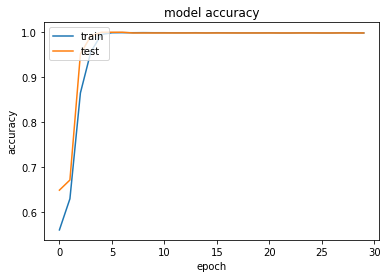

In [17]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

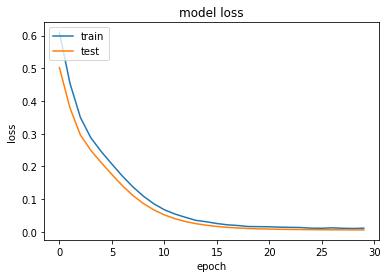

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Export Model

In [19]:
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("linear.tflite", "wb").write(tfmodel)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\KAVINDA\AppData\Local\Temp\tmp78f4ki0m\assets


3368